In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('train_dataset.csv',index_col='ID')
df_test=pd.read_csv('test_dataset.csv',index_col='ID')

In [27]:
df_test.shape

(3200, 18)

In [28]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6800 entries, 7135 to 4826
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         6800 non-null   int64  
 1   Status         6800 non-null   object 
 2   Drug           4775 non-null   object 
 3   Age            6800 non-null   int64  
 4   Sex            6800 non-null   object 
 5   Ascites        4554 non-null   object 
 6   Hepatomegaly   4373 non-null   object 
 7   Spiders        4210 non-null   object 
 8   Edema          6800 non-null   object 
 9   Bilirubin      6800 non-null   float64
 10  Cholesterol    3699 non-null   float64
 11  Albumin        6800 non-null   float64
 12  Copper         4644 non-null   float64
 13  Alk_Phos       4302 non-null   float64
 14  SGOT           4698 non-null   float64
 15  Tryglicerides  3988 non-null   float64
 16  Platelets      6462 non-null   float64
 17  Prothrombin    6645 non-null   float64
 18  Stage

In [30]:
df.nunique()

N_Days           3069
Status              3
Drug                2
Age              4744
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         203
Cholesterol       456
Albumin           257
Copper            277
Alk_Phos         3607
SGOT             3129
Tryglicerides     268
Platelets         498
Prothrombin        68
Stage               4
dtype: int64

All object data types columns and stage column are categorical variables,all other int/float columns are numerical variables.

<AxesSubplot:xlabel='Stage', ylabel='count'>

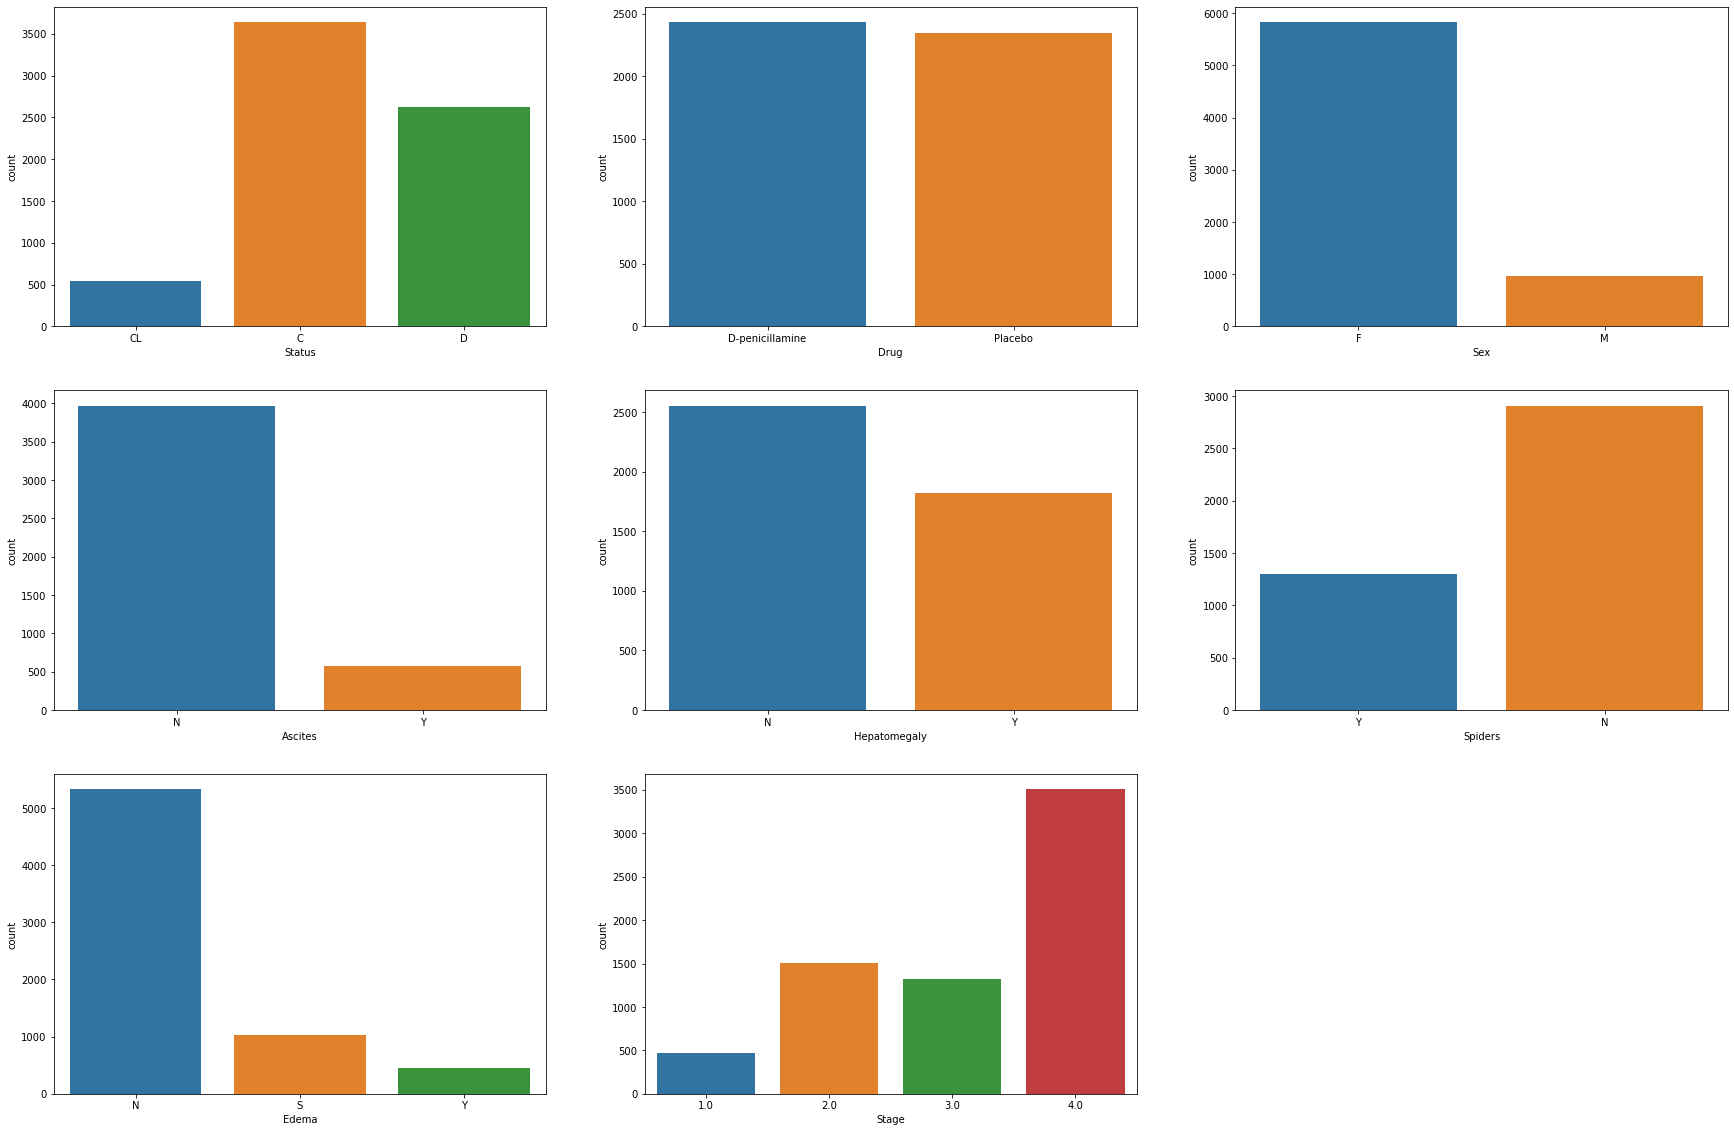

In [31]:
plt.figure(figsize=(30,20))
i=1
for c in df.select_dtypes(include=('object')):
    plt.subplot(3,3,i)
    i+=1
    sns.countplot( df[c])
plt.subplot(3,3,8)
sns.countplot( df["Stage"])

#We see the data is not even according to all class

<AxesSubplot:xlabel='Stage', ylabel='count'>

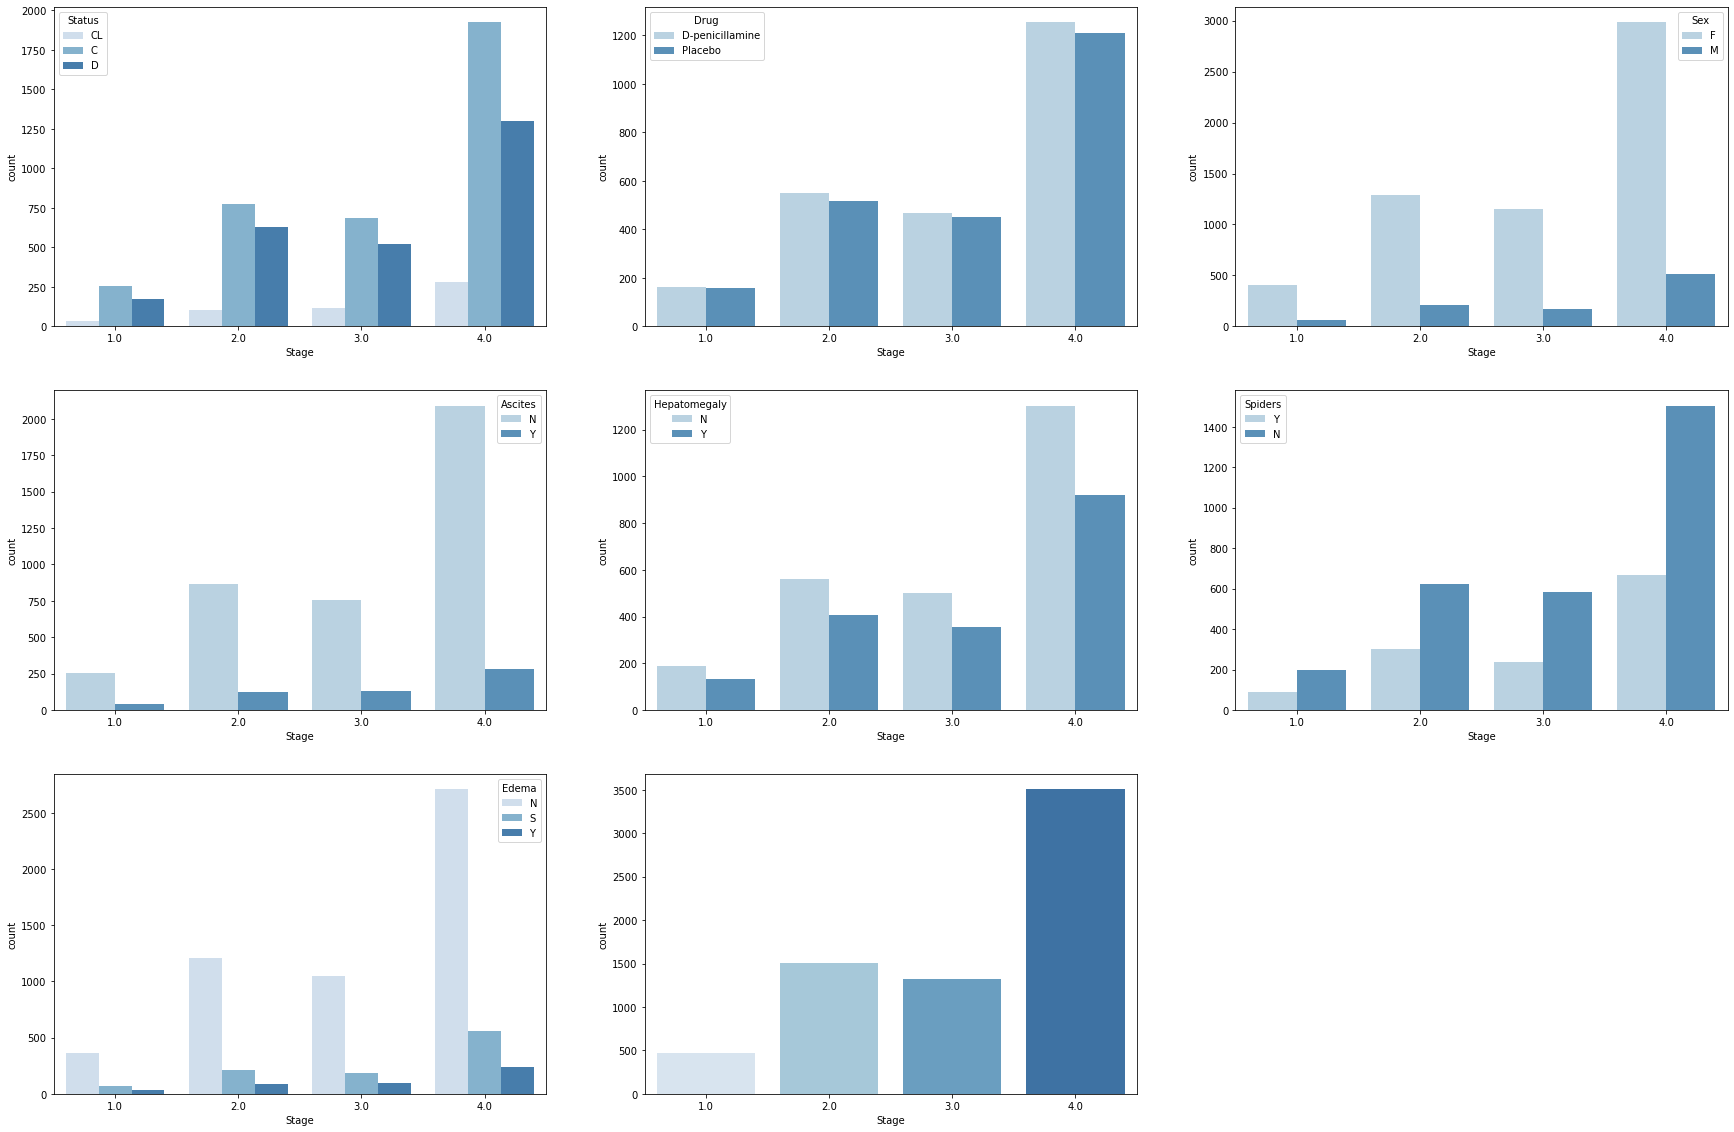

In [32]:
plt.figure(figsize=(30,20))
i=1
for c in df.select_dtypes(include=('object')):
    plt.subplot(3,3,i)
    i+=1
    sns.countplot( x=df['Stage'],hue=df[c],palette='Blues', alpha=0.9)
plt.subplot(3,3,8)
sns.countplot( x=df['Stage'],palette='Blues', alpha=0.9)


### We could observe from above plots the following point:

D-penicillamine and Placebo has equal weightage in doses in all stages.
 
Females are more likely to be affected by Liver Disease that too rising case in 4th Stage.
 
N category of Edema was present mostly in Stage 4
 
Stage 4 cases are more reported due to probably late symptoms of the liver disease which surpases earlier stage.

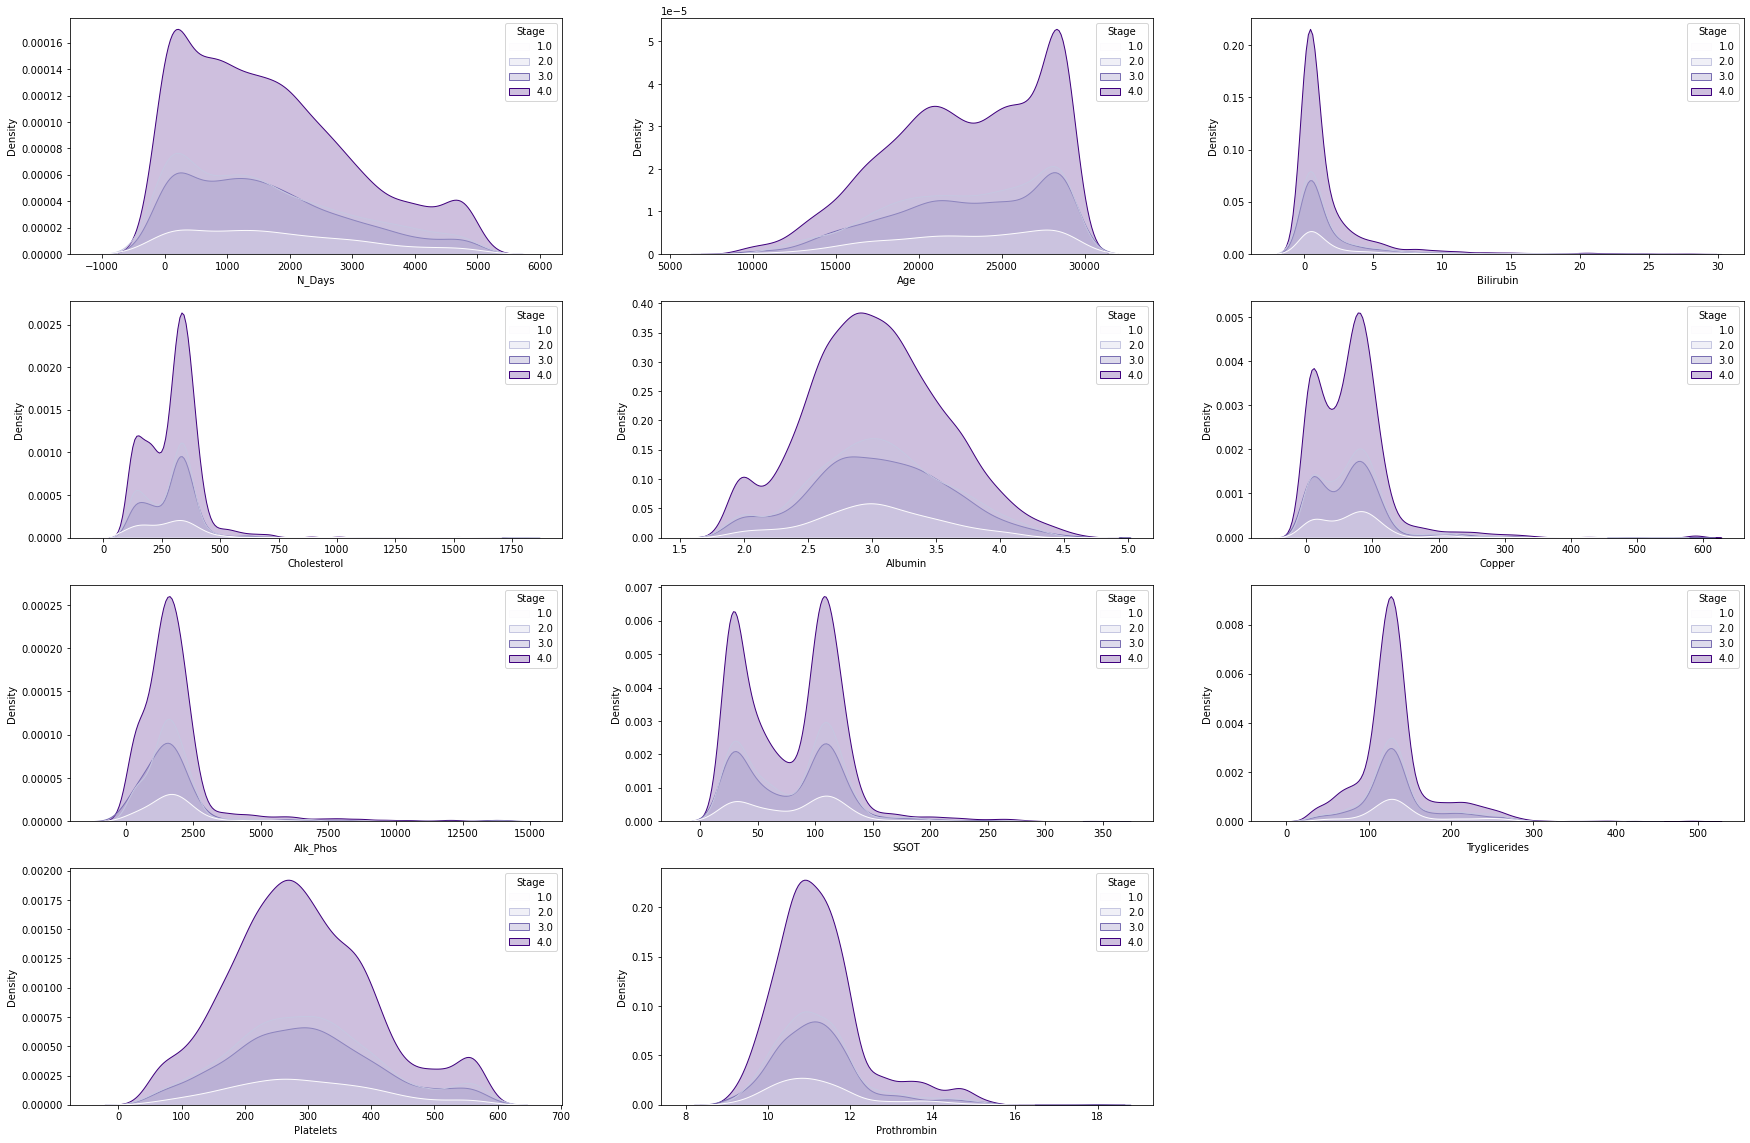

In [33]:
plt.figure(figsize=(30,20))
i=1
for c in df.select_dtypes(include=(['int64', 'float64'])).columns:
    if c=="Stage":
        continue
    plt.subplot(4,3,i)
    i+=1
    sns.kdeplot(df[c], hue=df['Stage'], fill=True, palette='Purples')

With increase in number of days between registration and the earlier of death, transplantation, or study analysis time the liver disease is cured faster hence decrease in all no. of stages.

As the patient's age increases the risk of liver disease increases with most in Stage 4.

In general Stage 4 patient has higher presence of different  numerically measured liver features.

### Exploring Gender comparison

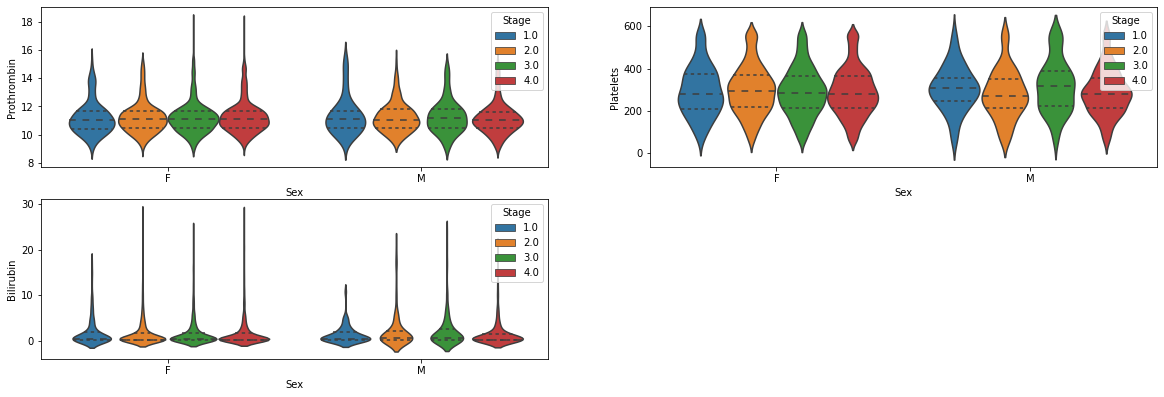

In [34]:
plt.figure(figsize=(20,10))
cf= {'Platelets','Prothrombin','Bilirubin'}
i=1
for c in cf:
    plt.subplot(3,2,i)
    i=i+1
    sns.violinplot(x=df['Sex'],y=df[c],hue=df['Stage'],inner='quartile')
    

Density of Bilirubin is less in both male and female but we found some cases where it surges starting from Stage 1.

Cases of rise in  Prothrombin level was seen mostly in Female cases having extreme stage liver disease i.e 3 and 4.



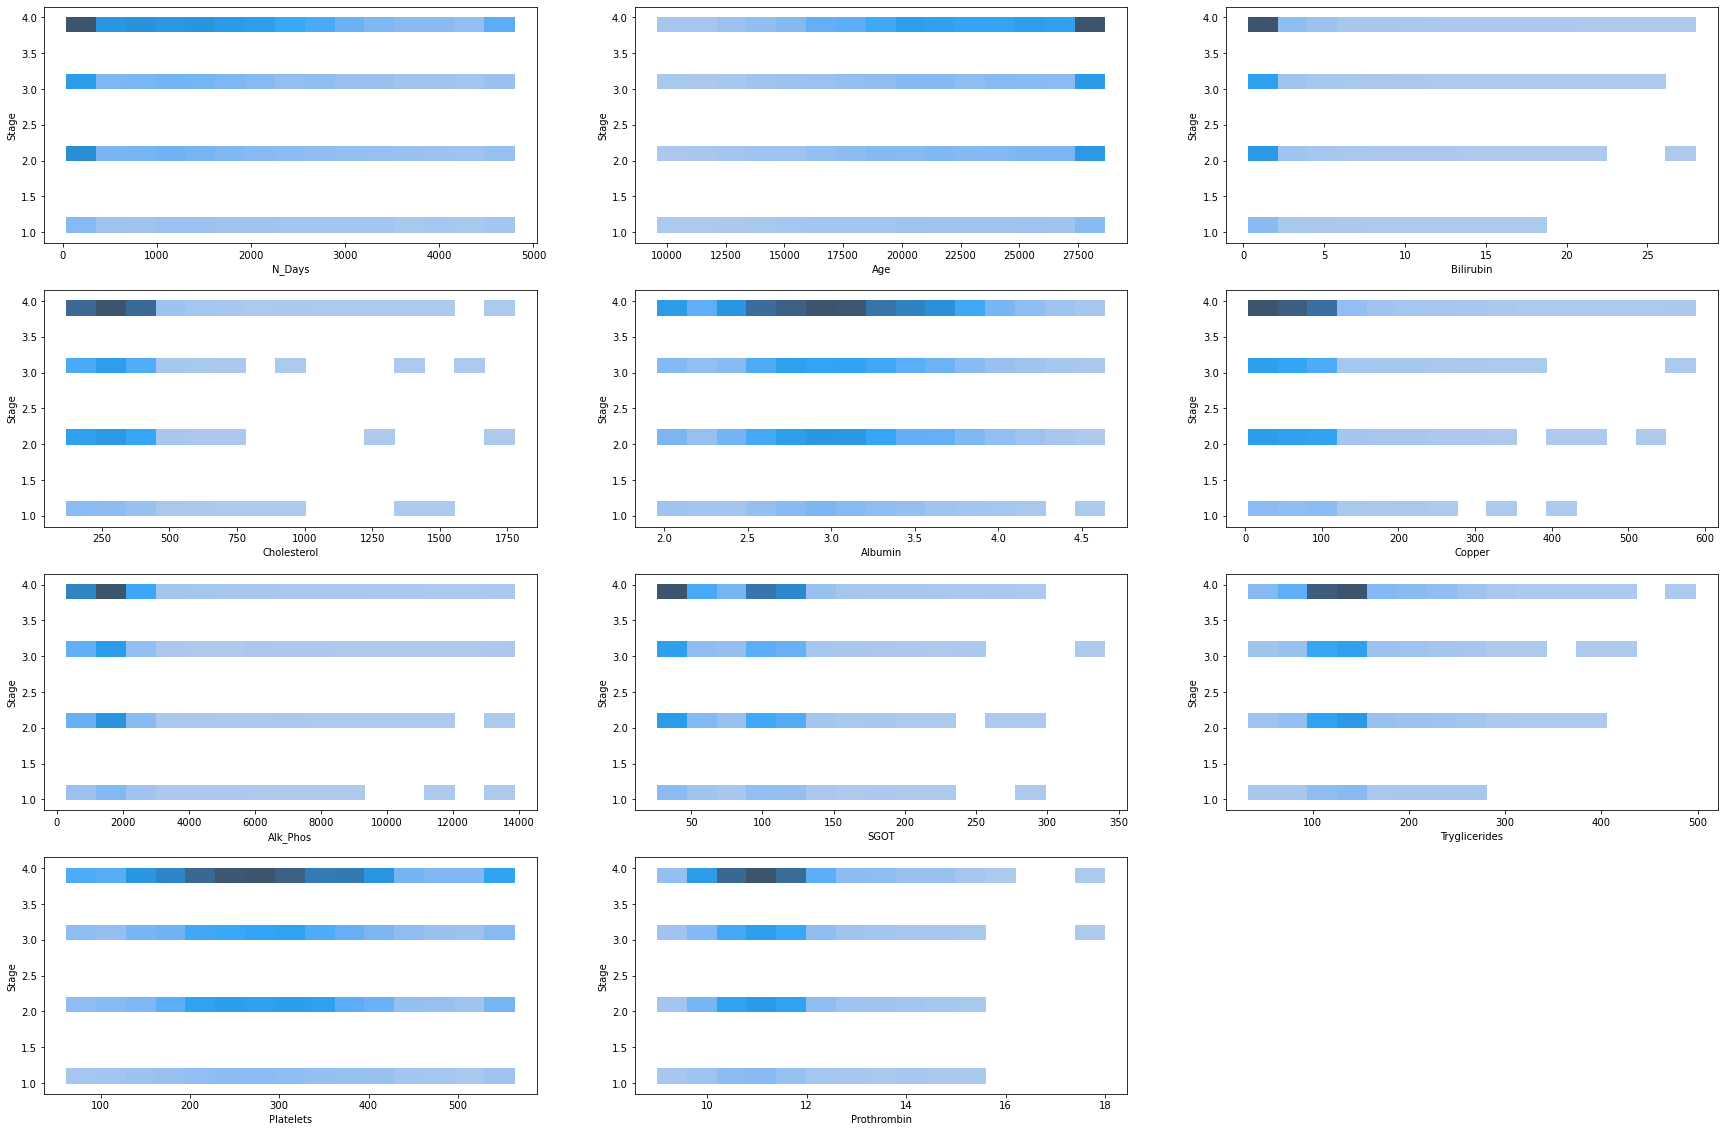

In [35]:
plt.figure(figsize=(30,20))
i=1
for c in df.select_dtypes(include=(['int64', 'float64'])).columns:
    if c=="Stage":
        continue
    plt.subplot(4,3,i)
    i+=1
    sns.histplot(x=df[c], y=df['Stage'],bins=15)

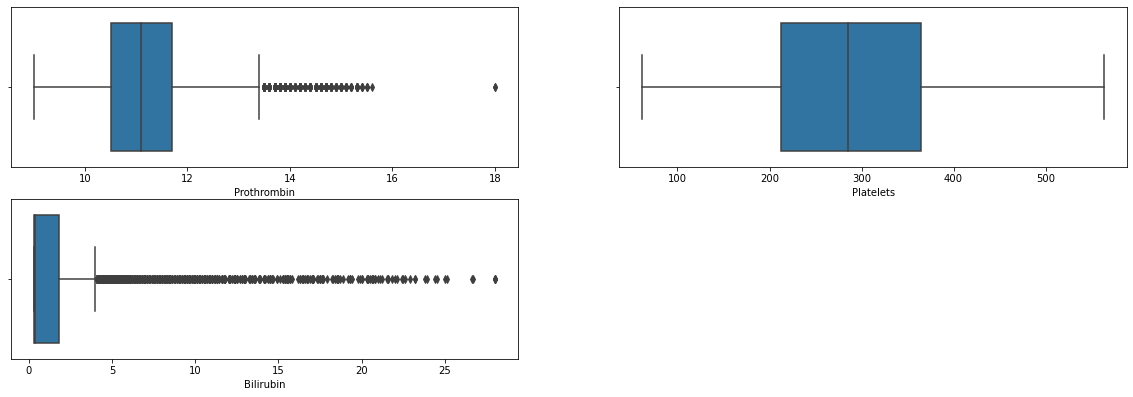

In [36]:
plt.figure(figsize=(20,10))
cf= {'Platelets','Prothrombin','Bilirubin'}
i=1
for c in cf:
    plt.subplot(3,2,i)
    i=i+1
    sns.boxplot(x=df[c],hue=df['Stage'])
    

As number of outliers are way high dropping them would not be good as it would affect the training of model and thus the score

In [37]:
categorical_cols=list(df.select_dtypes(include=('object')).columns)
continuous_cols=list(df.select_dtypes(include=(['int64', 'float64'])).columns)
continuous_cols.remove("Stage")
non_null_cols=list(df.columns[df.notnull().all()])
non_null_cols.remove("Stage")
print(non_null_cols)

['N_Days', 'Status', 'Age', 'Sex', 'Edema', 'Bilirubin', 'Albumin']


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
df_test[continuous_cols] = scaler.transform(df_test[continuous_cols])

In [39]:
 # replacing catagorical data with intigers in train data
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})     # 'C':0, 'CL':1, 'D':-1

 # replacing catagorical data with intigers in test data
df_test['Sex'] = df_test['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df_test['Ascites'] = df_test['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df_test['Drug'] = df_test['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df_test['Hepatomegaly'] = df_test['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df_test['Spiders'] = df_test['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df_test['Edema'] = df_test['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df_test['Status'] = df_test['Status'].replace({'C':0, 'CL':1, 'D':-1})   

<AxesSubplot:>

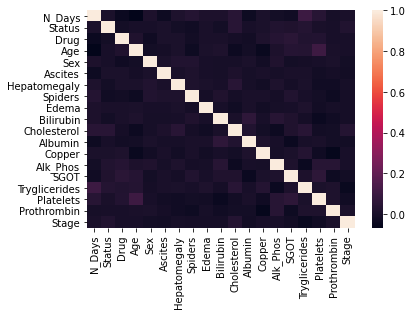

In [40]:
sns.heatmap(df.corr(), fmt = ".2f")

There is not much correlation between features.

In [213]:
df.corr()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,0.006840,-0.035978,-0.069048,0.013816,-0.031093,0.016119,0.033535,0.013727,0.013037,0.045464,-0.028400,0.008272,-0.011724,-0.022703,0.099012,0.042913,-0.006062,0.004066
Status,0.006840,1.000000,-0.013506,-0.001128,0.001164,0.008727,-0.012336,-0.020520,0.005777,-0.010623,0.045075,0.001007,0.006169,0.023031,0.022049,0.034721,0.003505,0.001908,0.026065
Drug,-0.035978,-0.013506,1.000000,0.022108,-0.024106,0.009293,0.010275,-0.015001,0.005933,0.005009,-0.006536,-0.015917,0.016241,0.036587,0.051108,0.022982,0.027758,-0.000772,0.000584
Age,-0.069048,-0.001128,0.022108,1.000000,-0.014149,-0.010194,0.007326,-0.029718,0.006170,0.017183,-0.035271,-0.011826,-0.043328,0.014469,0.036427,0.032096,0.105258,0.005112,-0.001854
Sex,0.013816,0.001164,-0.024106,-0.014149,1.000000,0.008337,0.025391,0.025404,0.000761,-0.006151,-0.004399,0.010137,-0.016111,0.020542,-0.014293,-0.010295,-0.000127,0.006570,-0.012433
Ascites,-0.031093,0.008727,0.009293,-0.010194,0.008337,1.000000,0.004788,0.016540,0.001361,-0.004251,0.011066,-0.004148,0.002621,-0.003345,0.004006,0.001957,-0.018179,-0.007914,-0.016884
Hepatomegaly,0.016119,-0.012336,0.010275,0.007326,0.025391,0.004788,1.000000,0.016257,0.010037,0.000823,0.044094,-0.005921,-0.018030,0.017047,-0.007079,0.008365,-0.020649,-0.022900,-0.004158
Spiders,0.033535,-0.020520,-0.015001,-0.029718,0.025404,0.016540,0.016257,1.000000,-0.006925,0.021225,-0.009384,0.004038,0.003506,-0.010428,0.024053,0.000085,-0.013254,-0.028451,-0.009396
Edema,0.013727,0.005777,0.005933,0.006170,0.000761,0.001361,0.010037,-0.006925,1.000000,0.001000,-0.019649,0.005843,-0.016123,-0.003993,0.001269,0.015509,-0.014821,-0.003061,-0.008758
Bilirubin,0.013037,-0.010623,0.005009,0.017183,-0.006151,-0.004251,0.000823,0.021225,0.001000,1.000000,0.005986,0.062583,0.001208,0.040346,0.020157,-0.009782,-0.037234,-0.019610,-0.010225
